# Notebook for digit recognition of images


In [1]:
# import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# import dataset, train and test
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

Visualize data

In [3]:
# show an overview of dataset
train_data.head()

train_labels = train_data['label']
train_samples = train_data.drop(columns='label')

train_labels.head()
train_samples.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# count occurences of labels
print(train_labels.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


Visualize some images of the data set

In [5]:
def plot_image(image):
    plt.imshow(image)

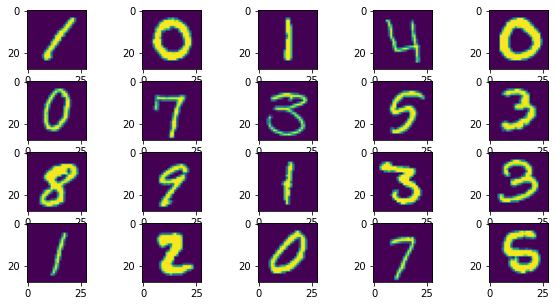

In [6]:
#plot first twenty images
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plot_image(np.array(train_samples.loc[i]).reshape(28, 28))
plt.show()

In [7]:
# split train data in sub train and test set, in order to train and evaluate locally the model

x_train, x_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


Creation of two different models, one with Flatten layers and the other with Dense layer as Input layer. This is useful to do a comparison between the models


In [8]:
# create a simple neural network

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 4.1393 - accuracy: 0.8287
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5678 - accuracy: 0.8794
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3760 - accuracy: 0.9086
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3152 - accuracy: 0.9221
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2623 - accuracy: 0.9309
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.9346
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2287 - accuracy: 0.9401
Epoch 8/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2183 - accuracy: 0.9430
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1950 - accuracy: 0.9495
Epoch 10/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.196

In [9]:
# create a simple neural network
x_train_f = x_train.values.reshape(-1,28,28,1)
print(x_train_f.shape)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

#print(model_1.summary())
history_2 = model_2.fit(x_train_f, y_train, epochs=20)

(33600, 28, 28, 1)
Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 4.3701 - accuracy: 0.8353
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.8743
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.9022
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3616 - accuracy: 0.9122
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3220 - accuracy: 0.9212
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.9308
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.9364
Epoch 8/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2330 - accuracy: 0.9399
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2274 - accuracy: 0.9425
Epoch 10/20
1050/1050 [==============================] - 1s 1ms

Plot the loss and the accuracy of the two models over the epochs

Text(0.5, 1.0, 'Loss and Accuracy of Model 2')

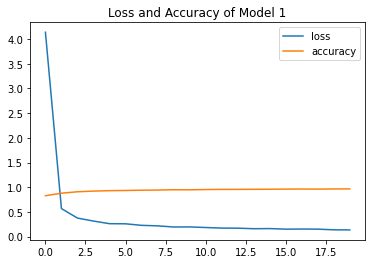

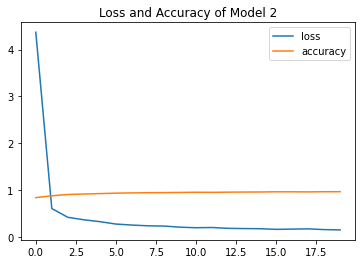

In [10]:
# plot accuracy of models
pd.DataFrame(history_1.history).plot()
plt.title("Loss and Accuracy of Model 1")

pd.DataFrame(history_2.history).plot()
plt.title("Loss and Accuracy of Model 2")

In [11]:
# compute the loss and other metrics of the model
loss_1,accuracy_1 = model_1.evaluate(x_test,y_test)

263/263 [==============================] - 0s 965us/step - loss: 0.3819 - accuracy: 0.9440


Definition of a function to convert a multi class array format (i.e. if we have 3 classes, the labels array should be 
[ [0,0,1], [1,0,0], ...]. Now I'll convert the array in the format [label1, label2,...]

In [12]:
def convert_multi_dimensional_array_to_array(multi_array):
    single_array = []

    for elem in multi_array:    
        single_array.append(elem.argmax())
        
    return single_array

In [13]:
# Test the model on the test set, making a comparison between the y_test labels and the output of predict function
y_pred = model_1.predict(x_test)
yy_pred = convert_multi_dimensional_array_to_array(y_pred)

confusion_matrix(y_test, yy_pred)

array([[743,   0,   1,   0,   1,   5,   6,   1,  54,   1],
       [  0, 941,   7,   4,   0,   1,   0,   5,   8,   0],
       [  3,   1, 804,   4,   6,   1,   3,   9,  17,   0],
       [  0,   0,  29, 785,   0,   9,   0,   7,  25,   5],
       [  0,   3,   3,   0, 823,   1,  12,   8,   6,  15],
       [  0,   0,   2,   7,   2, 708,   9,   1,  16,   9],
       [  0,   2,   2,   0,   3,   5, 759,   0,  12,   0],
       [  2,   2,   3,   2,   3,   0,   0, 862,   6,   5],
       [  1,   9,   6,   8,   2,   8,   8,   2, 740,   2],
       [  0,   0,   1,   9,  23,   3,   0,  15,  19, 765]], dtype=int64)

In [14]:
y_final= model_1.predict(test_data)

In [15]:
y_final = np.array(convert_multi_dimensional_array_to_array(y_final))
print(y_final.shape)

(28000,)


## Write test results on a txt file

In [16]:
result_file= open("result.txt","w+")
result_file.truncate()
result_file.write("ImageId,Label\n")
count = 1 
for elem in y_final:
    result_file.write(str(count) + ","+ str(elem) + "\n")
    count +=1
result_file.close()